In [21]:
import h5py
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage import data
import numpyro
import numpyro.distributions as dist
import jax.random as random
import einops
import jax
import jax.numpy as jnp
import SimpleITK as sitk

dir_example='/workspaces/jax_cpu_experiments_b/explore/spleen_2_image.nii.gz'
imageA=sitk.ReadImage(dir_example)
arr=np.array(sitk.GetArrayFromImage(imageA))
arr= np.rot90(np.rot90(arr[75,:,:])) 
arr=arr-np.min(arr.flatten())
arr=arr/np.max(arr.flatten())
arr= arr[188:-128,208:-68 ]

arr.shape

(196, 236)

<Figure size 640x480 with 0 Axes>

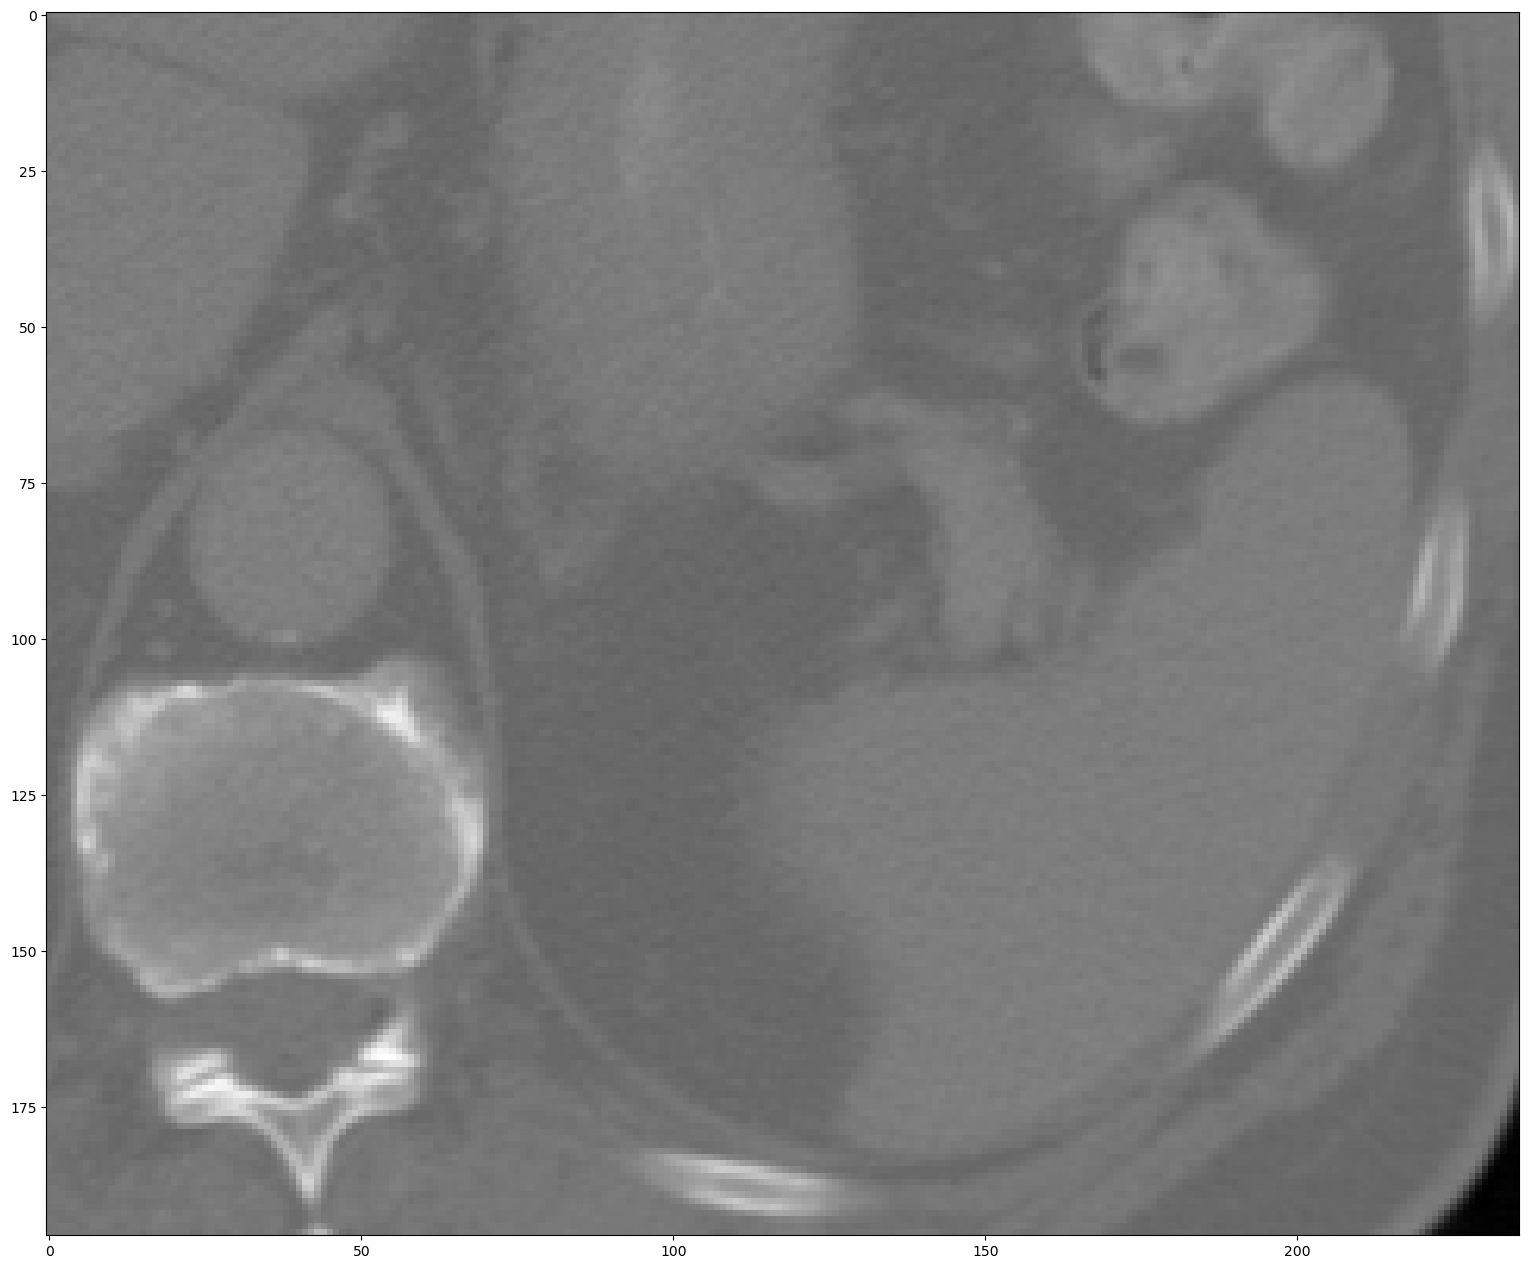

In [34]:
plt.set_cmap("gray")
plt.figure(figsize = (19,19))
plt.imshow(arr)
plt.show()

<Figure size 640x480 with 0 Axes>

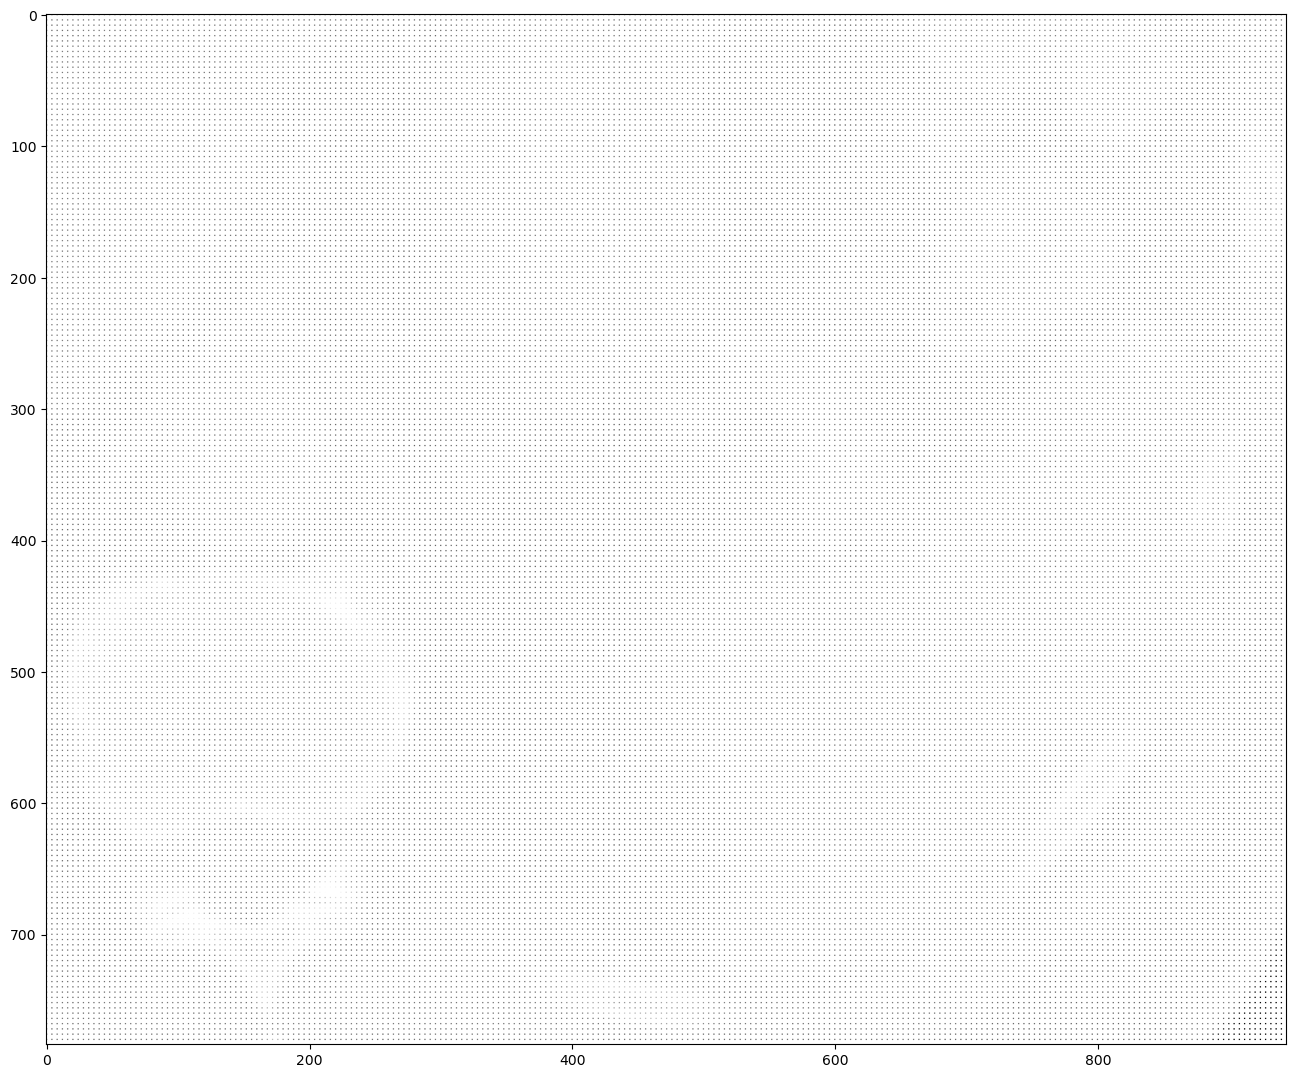

In [36]:

to_disp=einops.rearrange([arr,np.ones_like(arr)],'f w h -> (w f) h' )
to_disp=einops.rearrange([to_disp,np.ones_like(to_disp)],'f w h -> w (h f)' )
to_disp=einops.rearrange([to_disp,np.ones_like(to_disp)],'f w h -> (w f) h')
to_disp=einops.rearrange([to_disp,np.ones_like(to_disp)],'f w h -> w (h f)' )

plt.set_cmap("gray")
plt.figure(figsize = (16,16))
plt.imshow(to_disp)
plt.show()